<a href="https://colab.research.google.com/github/amballa-mahesh/NLP_Encoder_Decoder_Language_translation/blob/main/Encoder_Decoder_Language_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import numpy as np

In [3]:
path = "/content/mydrive/MyDrive/Seq to Seq learning/fra.txt"

In [22]:
file  =  open(path,"r")
data  = file.read().split('\n')
len(data)

197464

In [31]:
# Reading the data from the file path

file  =  open(path,"r")
input_texts  = []
target_texts = []
input_characters = set()
target_characters = set()
data  = file.read().split('\n')
for line in range(0,19999):
  input_text,target_text,_ = data[line].split('\t')
  target_text = '\t'+target_text+'\n'

# listing the input and target texts datas

  input_texts.append(input_text)
  target_texts.append(target_text)

# listing all the unique characters of both input and target texts

  for char in input_text:
    input_characters.add(char)
  for char in target_text:
    target_characters.add(char)

input_characters    = sorted(list(input_characters))
target_characters   = sorted(list(target_characters))

# finding the number of encoder, decoder tokens and max len of the texts.
num_encoder_tokens   = len(input_characters)
num_decoder_tokens   = len(target_characters)
max_encoder_seq_len = max([len(text) for text in input_texts])
max_decoder_seq_len = max([len(text) for text in target_texts])


print('no. of input_samples: ', len(input_texts))
print('no. of target_samples: ', len(target_texts))
print('no. of unique input tokens: ', num_encoder_tokens)
print('no. of unique output tokens: ', num_decoder_tokens)
print('max length of input tokens: ', max_encoder_seq_len)
print('max length of output tokens: ', max_decoder_seq_len)

# indexing the encoder and decoder characters using dictionary

input_token_index   = dict([char,i]  for i, char in enumerate(input_characters))
target_token_index  = dict([char,i] for i , char in enumerate(target_characters))

#making the zero valued encoder_input_data  numpy array with shape as 9999,15,71. 
#making the zero valued decoder_input_data  numpy array with shape as 9999,59,93. 
#making the zero valued encoder_output_data numpy array with shape as 9999,59,93. 

encoder_input_data  = np.zeros((len(input_texts), max_encoder_seq_len,num_encoder_tokens),dtype = 'float32')
decoder_input_data  = np.zeros((len(target_texts),max_decoder_seq_len,num_decoder_tokens),dtype = 'float32')
decoder_target_data = np.zeros((len(target_texts),max_decoder_seq_len,num_decoder_tokens),dtype = 'float32')

#assiging the value 1.0 to the index of each character and if the lenght of text is less than the max lenght of max encoder_seq_len then assgin 1.0 to space.

for i , text in enumerate(input_texts):
  for j, char in enumerate(text):
    encoder_input_data[i,j,input_token_index[char]]  = 1.0
  encoder_input_data[i,j+1:,input_token_index[' ']] = 1.0 

# assiging the value 1.0 to the index of each character and if the lenght of text is less than the max lenght of max decoder_seq_len then assgin 1.0 to space.
# here we are assigning the 1.0 to jth line of decoder_input_data where as j+1th for decoder_output_data.
# this is because at the time of prediction we map the jth character of decoder input data to j+1th character of decoder output data.

for i , text in enumerate(target_texts):
  for j, char in enumerate(text):
    decoder_input_data[i,j,target_token_index[char]]  = 1.0
    if j>0:
      decoder_target_data[i,j-1,target_token_index[char]] = 1.0
  
  decoder_input_data[i,j+1:,input_token_index[' ']] = 1.0 
  decoder_target_data[i,j:,input_token_index[' ']]  = 1.0


no. of input_samples:  19999
no. of target_samples:  19999
no. of unique input tokens:  74
no. of unique output tokens:  100
max length of input tokens:  17
max length of output tokens:  59


In [32]:
encoder_input_data.shape,decoder_input_data.shape,decoder_target_data.shape

((19999, 17, 74), (19999, 59, 100), (19999, 59, 100))

In [33]:
encoder_input_data[0][0], encoder_input_data.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 (19999, 17, 74))

As Mentioned above we have created numpy arrays such that the j+1th decoder input data character index value is equal to the jth decoder output data character index value.

In [34]:
decoder_input_data[100][2], encoder_input_data.shape

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 (19999, 17, 74))

In [35]:
decoder_target_data[100][1], decoder_target_data.shape

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 (19999, 59, 100))

In [36]:
import tensorflow
from tensorflow import keras

In [37]:
batch_size = 64
latent_dim = 256

Creation of Encoder Inputs and Outputs (Here we use only cell and memory states encoder as the decoder inputs)


In [38]:
# Define an input sequence and process it.

encoder_inputs                  = keras.Input(shape=(None,num_encoder_tokens))
encoder_lstm                    = keras.layers.LSTM(latent_dim,return_state=True)
encoder_outputs,state_h,state_c = encoder_lstm(encoder_inputs)

# we discard encoder outputs, we consider only the states
encoder_states = [state_h,state_c]

Creation of Decoder Inputs and Outputs

In [39]:
# setting up our decoder to return full output sequences,
# we consider only decoder outputs not the states as encoder 
# return states in the training model, but we will use them in inference.

decoder_inputs      = keras.Input(shape= (None, num_decoder_tokens))
decoder_lstm        = keras.layers.LSTM(latent_dim,return_state=True,return_sequences=True)
decoder_outputs,_,_ = decoder_lstm(decoder_inputs,initial_state =encoder_states)
decoder_dense       = keras.layers.Dense(num_decoder_tokens,activation = 'softmax')
decoder_outputs     = decoder_dense(decoder_outputs)


In [40]:
print(encoder_outputs)
print(decoder_outputs)
print(decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 100), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 100), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


Model Creation, training and saving as .h5 file

In [41]:
model = keras.Model([encoder_inputs,decoder_inputs],decoder_outputs)

In [42]:
model.compile(optimizer= 'adam',loss = 'categorical_crossentropy',metrics ='accuracy')

In [43]:
model.fit([encoder_input_data,decoder_input_data],decoder_target_data,
          epochs = 20,
          batch_size= batch_size,
          validation_split =0.2,
          )
model.save('s2s_letters.h5')

Epoch 1/20
250/250 [==============================] - 9s 18ms/step - loss: 1.1715 - accuracy: 0.7192 - val_loss: 0.9907 - val_accuracy: 0.7319
Epoch 2/20
250/250 [==============================] - 3s 13ms/step - loss: 0.7191 - accuracy: 0.7992 - val_loss: 0.7499 - val_accuracy: 0.7839
Epoch 3/20
250/250 [==============================] - 4s 15ms/step - loss: 0.5992 - accuracy: 0.8257 - val_loss: 0.6805 - val_accuracy: 0.8015
Epoch 4/20
250/250 [==============================] - 3s 14ms/step - loss: 0.5493 - accuracy: 0.8385 - val_loss: 0.6418 - val_accuracy: 0.8119
Epoch 5/20
250/250 [==============================] - 3s 13ms/step - loss: 0.5175 - accuracy: 0.8470 - val_loss: 0.6124 - val_accuracy: 0.8196
Epoch 6/20
250/250 [==============================] - 3s 13ms/step - loss: 0.4903 - accuracy: 0.8545 - val_loss: 0.5840 - val_accuracy: 0.8268
Epoch 7/20
250/250 [==============================] - 4s 14ms/step - loss: 0.4676 - accuracy: 0.8606 - val_loss: 0.5678 - val_accuracy: 0.8323

In [44]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 74)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None, 100)]  0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 256),        338944      ['input_5[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [45]:
from keras.utils.vis_utils import plot_model

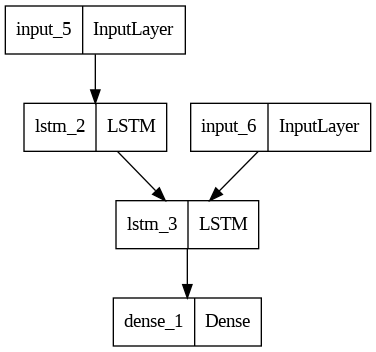

In [46]:
plot_model(model)

In [47]:
# encoder model

model = keras.models.load_model('s2s_letters.h5')
encoder_inputs = model.input[0]
encoder_outputs,state_h,state_c = model.layers[2].output
encoder_states = [state_h,state_c]
encoder_model  = keras.Model(encoder_inputs,encoder_states)

In [48]:
# decoder model

decoder_inputs = model.input[1]
decoder_state_input_h = keras.Input(shape = (latent_dim,))
decoder_state_input_c = keras.Input(shape = (latent_dim,))
decoder_state_inputs         = [decoder_state_input_h,decoder_state_input_c]

decoder_lstm  = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(decoder_inputs, initial_state= decoder_state_inputs )

decoder_states = [state_h_dec,state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = keras.Model([decoder_inputs]+decoder_state_inputs,[decoder_outputs]+decoder_states)


reverse_input_char_index  = dict((i,char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i,char) for char, i in target_token_index.items())


In [49]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq,verbose =False)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value,verbose =False)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_len):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

Testing the Model

In [53]:
for i in range(40,50):
  input_seq = encoder_input_data[i:i+1]
  decoded_sentence = decode_sequence(input_seq)
  print('---------------------')
  print("Input_sequence: " ,input_texts[i])
  print('Output_sequence: ',decoded_sentence)

---------------------
Input_sequence:  Wait!
Output_sequence:  Attendez !

---------------------
Input_sequence:  Wait.
Output_sequence:  Attendez !

---------------------
Input_sequence:  Wait.
Output_sequence:  Attendez !

---------------------
Input_sequence:  Wait.
Output_sequence:  Attendez !

---------------------
Input_sequence:  Wait.
Output_sequence:  Attendez !

---------------------
Input_sequence:  Begin.
Output_sequence:  Commence.

---------------------
Input_sequence:  Begin.
Output_sequence:  Commence.

---------------------
Input_sequence:  Go on.
Output_sequence:  Dégardez.

---------------------
Input_sequence:  Go on.
Output_sequence:  Dégardez.

---------------------
Input_sequence:  Go on.
Output_sequence:  Dégardez.



In [54]:
input_texts[40:50],target_texts[40:50]

(['Wait!',
  'Wait.',
  'Wait.',
  'Wait.',
  'Wait.',
  'Begin.',
  'Begin.',
  'Go on.',
  'Go on.',
  'Go on.'],
 ['\tAttendez.\n',
  '\tAttends !\n',
  '\tAttendez !\n',
  '\tAttends.\n',
  '\tAttendez.\n',
  '\tCommencez.\n',
  '\tCommence.\n',
  '\tPoursuis.\n',
  '\tContinuez.\n',
  '\tPoursuivez.\n'])